In [1]:
import pandas as pd 
import numpy as np
from bertopic import BERTopic

In [2]:
df = pd.read_csv('Original.csv', encoding='latin1', na_values=['missing'])

df.drop(columns=['Review_ID'], inplace=True)
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')
df = df.loc[df['Branch'] == 'Disneyland_California']

df = df[df['Rating'] >= 4]

In [3]:
docs = df['Review_Text'].to_list()
docs

['This place has always been and forever will be special. The feeling you get entering the park, seeing the characters and different attractions is just priceless. This is definitely a dream trip for all ages, especially young kids. Spend the money and go to Disneyland, you will NOT regret it',
 "A great day of simple fun and thrills. Bring cash, nothing is cheap, but we knew that it's Disney. But they are great letting you bring in your own food, drinks, etc but read the list closely, we list several items at the entry gates (selfy sticks, glass refill bottles, etc). It is worth buying the photo pass and fastpass. Have fun! ",
 "All and all a great day was had. The crowds are huge and ride times sometimes up to a 50 min wait but worth it. Very disappointed the castle was under repair and covered but we understood. If you want to take a short cut on the rides grab a Max Pass for 15 each it allows you to book a time every 90mins and believe me it's a great feeling floating past the ques

In [4]:
len(docs)

16499

In [5]:
from bertopic import BERTopic
from bertopic.representation import PartOfSpeech, KeyBERTInspired, MaximalMarginalRelevance
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer

topics_list = ['Crowd', 'Closed', 'Lines', 'Wheelchair', 'Price', 'Staff Cast', 'Kids', 'Adults']

embedding_model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
representation_model = PartOfSpeech('en_core_web_lg')
topic_model = BERTopic(min_topic_size=5
                    #    zeroshot_topic_list=topics_list,
                    #    zeroshot_min_similarity=0.9,
                       ctfidf_model=ctfidf_model,
                       embedding_model=embedding_model, 
                       representation_model=representation_model, 
                       verbose=True)

topics, probabilities = topic_model.fit_transform(docs)

Batches:   0%|          | 0/516 [00:00<?, ?it/s]

2024-04-21 13:04:16,219 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/516 [00:00<?, ?it/s]

2024-04-21 13:05:49,170 - BERTopic - Embedding - Completed ✓
2024-04-21 13:05:49,171 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-21 13:06:06,067 - BERTopic - Dimensionality - Completed ✓
2024-04-21 13:06:06,068 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-21 13:06:06,916 - BERTopic - Cluster - Completed ✓
2024-04-21 13:06:06,919 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-21 13:06:08,108 - BERTopic - Representation - Completed ✓


In [8]:
len(topic_model.get_topic_freq())

2

In [56]:
topic_model.reduce_topics(docs, nr_topics=10)

2024-04-21 00:29:33,703 - BERTopic - Topic reduction - Reducing number of topics
2024-04-21 00:29:35,193 - BERTopic - Topic reduction - Reduced number of topics from 15 to 10


In [6]:
topic_model.visualize_topics()

ValueError: zero-size array to reduction operation maximum which has no identity

In [59]:
topic_model.visualize_barchart(top_n_topics=8)

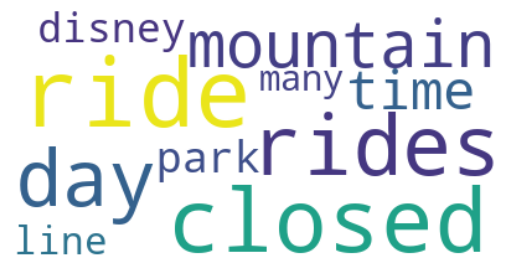

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=3)

In [23]:
len(topics)

2907

In [42]:
topic_model.visualize_topics()